In [2]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn.model_selection import train_test_split #разделение выборки
from sklearn import preprocessing #предобработка
%matplotlib inline
plt.style.use('seaborn')

C:\Users\askar\AppData\Local\Temp\ipykernel_9468\2408503256.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [5]:
churn = pd.read_csv('E:\Все нужное\Skillfactory\Курс DS-3.0\IDE\ML\churn.csv')
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


- RowNumber — номер строки таблицы;
- CustomerId — идентификатор клиента;
- Surname — фамилия клиента;
- CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их);
- Geography — страна проживания клиента (банк межнациональный);
- Gender — пол клиента;
- Age — возраст клиента;
- Tenure — сколько лет клиент пользуется банком;
- Balance — сколько у клиента денег на счетах в банке;
- NumOfProduct — число услуг банка, которые приобрёл клиент;
- HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет);
- IsActiveMember — есть ли у клиента статус активного участника банка (1 — да, 0 — нет);
- EstimatedSalary — предполагаемая заработная плата клиента;
- Exited — статус ушедшего (1 — ушедший клиент, 0 — лояльный клиент).

In [6]:
churn = churn[churn['Geography'] == 'Germany']
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
15,16,15643966,Goforth,616,Germany,Male,45,3,143129.41,2,0,1,64327.26,0
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
26,27,15736816,Young,756,Germany,Male,36,2,136815.64,1,1,1,170041.95,0
28,29,15728693,McWilliams,574,Germany,Female,43,3,141349.43,1,1,1,100187.43,0


In [8]:
churn = churn.drop(['Geography', 'CustomerId', 'RowNumber', 'Surname'], axis=1)
churn.shape

(2509, 10)

In [9]:
churn.isnull().sum()

CreditScore        0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
churn['BalanceSalaryRatio'] = churn['Balance'] / churn['EstimatedSalary']
churn['TenureByAge'] = churn['Tenure'] / churn['Age']
churn['CreditScoreGivenAge'] = churn['CreditScore'] / churn['Age']

In [11]:
churn['Gender'] = churn['Gender'].apply(lambda x: 1 if x =='Male' else 0)
churn.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
7,376,0,29,4,115046.74,4,1,0,119346.88,1,0.963969,0.137931,12.965517
15,616,1,45,3,143129.41,2,0,1,64327.26,0,2.225020,0.066667,13.688889
16,653,1,58,1,132602.88,1,1,0,5097.67,1,26.012449,0.017241,11.258621
26,756,1,36,2,136815.64,1,1,1,170041.95,0,0.804599,0.055556,21.000000
28,574,0,43,3,141349.43,1,1,1,100187.43,0,1.410850,0.069767,13.348837


In [13]:
X = churn.drop('Exited', axis=1)
y = churn['Exited']

In [14]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [16]:
y.value_counts(normalize=True) * 100


0    67.556796
1    32.443204
Name: Exited, dtype: float64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=0)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (1881, 12)
Test shape: (628, 12)


In [18]:
print('Train:', y_train.value_counts(normalize=True))
print('\n')
print('Test:', y_test.value_counts(normalize=True))

Train: 0    0.675704
1    0.324296
Name: Exited, dtype: float64


Test: 0    0.675159
1    0.324841
Name: Exited, dtype: float64


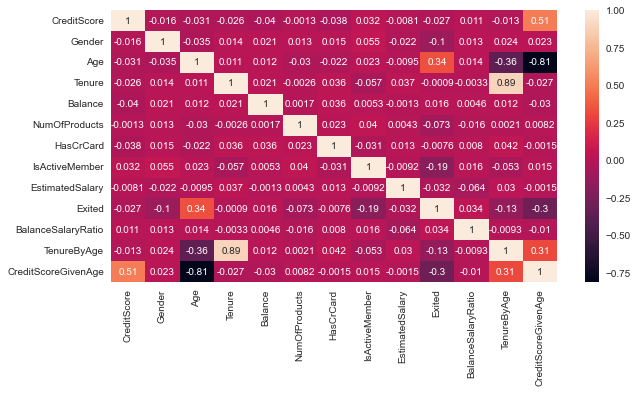

In [19]:
plt.figure(figsize = (10, 5))
sns.heatmap(churn.corr(), annot = True);

In [23]:
log_reg = linear_model.LogisticRegression(
    solver='sag',
    random_state=42,
    max_iter=1000
)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='sag')

In [24]:
#Делаем предсказание для тренировочной выборки
y_train_pred = log_reg.predict(X_train)
#Вывод отчет о метриках классификации
print(metrics.classification_report(y_train, y_train_pred))
#Делаем предсказание для тестовой выборки
y_test_pred = log_reg.predict(X_test)
#Вывод отчет о метриках классификации
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82      1271
           1       0.63      0.40      0.49       610

    accuracy                           0.73      1881
   macro avg       0.69      0.64      0.65      1881
weighted avg       0.72      0.73      0.71      1881

              precision    recall  f1-score   support

           0       0.75      0.89      0.81       424
           1       0.63      0.38      0.47       204

    accuracy                           0.72       628
   macro avg       0.69      0.63      0.64       628
weighted avg       0.71      0.72      0.70       628



In [29]:
poly = preprocessing.PolynomialFeatures(degree=3, include_bias=False)
poly.fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)
print(X_train_poly.shape)

(1881, 454)


In [31]:
log_reg_poly = linear_model.LogisticRegression(
    solver='sag',
    random_state=42,
    max_iter=1000
)
log_reg_poly.fit(X_train_poly, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='sag')

In [33]:
#Делаем предсказание для тренировочной выборки
y_train_pred_poly = log_reg_poly.predict(X_train_poly)
#Вывод отчет о метриках классификации
print(metrics.classification_report(y_train, y_train_pred_poly))
#Делаем предсказание для тестовой выборки
y_test_pred_poly = log_reg_poly.predict(X_test_poly)
#Вывод отчет о метриках классификации
print(metrics.classification_report(y_test, y_test_pred_poly))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1271
           1       0.78      0.56      0.66       610

    accuracy                           0.81      1881
   macro avg       0.80      0.74      0.76      1881
weighted avg       0.80      0.81      0.80      1881

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       424
           1       0.73      0.56      0.64       204

    accuracy                           0.79       628
   macro avg       0.77      0.73      0.75       628
weighted avg       0.79      0.79      0.78       628



Text(0, 0.5, 'Score')

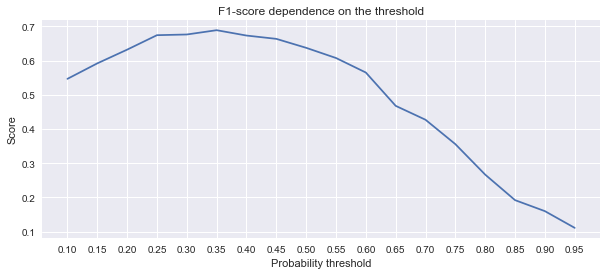

In [36]:
y_test_proba_pred = pd.Series(log_reg_poly.predict_proba(X_test_poly)[:, 1])
f1_scores = []
thresholds = np.arange(0.1, 1, 0.05)
for threshold in thresholds:
    y_test_pred_poly = y_test_proba_pred.apply(lambda x: 1 if x > threshold else 0)
    f1_scores.append(metrics.f1_score(y_test, y_test_pred_poly))
    
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(thresholds, f1_scores, label='F1')
ax.set_title('F1-score dependence on the threshold')
ax.set_xticks(thresholds) 
ax.set_xlabel('Probability threshold')
ax.set_ylabel('Score')

In [37]:
threshold_opt = 0.35
y_test_pred_opt = y_test_proba_pred.apply(lambda x: 1 if x > threshold_opt else 0)
print('Test F1: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred_opt)))

Test F1: 0.69
